## Mutual Information
MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

####I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

#####Youtube Videos
Entropy: https://www.youtube.com/watch?v=1IQOtJ4NI_0

Information Gain: https://www.youtube.com/watch?v=FuTRucXB9rA

Gini Impurity: https://www.youtube.com/watch?v=5aIFgrrTqOw

Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA

In [12]:
import pandas as pd
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()
## this is a classification problem i.e. it gets applied to classfication problem
 
## for classficicaion we have diff , for regression we have  diff lib : wrt to Mutual information

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
df['Wine'].unique()


array([1, 2, 3])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [15]:
## Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'], axis=1),
    df['Wine'],
    test_size=0.3,
    random_state=0)

In [16]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [17]:
from sklearn.feature_selection import mutual_info_classif
## determine the mutual information
mutual_info=mutual_info_classif(X_train, y_train)
mutual_info

## all values lie between 0 and 1
## having high values are important features as they make the depend variable easily determinable

array([0.42425228, 0.29821227, 0.14558484, 0.24295329, 0.17837674,
       0.49380268, 0.72061067, 0.10264235, 0.26855788, 0.62320733,
       0.55839023, 0.54024008, 0.52154138])

In [19]:
##mutual_info=pd.Series(mutual_info)
##mutual_info

In [20]:
mutual_info=pd.Series(mutual_info)
mutual_info.index =  X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.720611
Color.int               0.623207
Hue                     0.558390
OD                      0.540240
Proline                 0.521541
Phenols                 0.493803
Alcohol                 0.424252
Malic.acid              0.298212
Proanth                 0.268558
Acl                     0.242953
Mg                      0.178377
Ash                     0.145585
Nonflavanoid.phenols    0.102642
dtype: float64

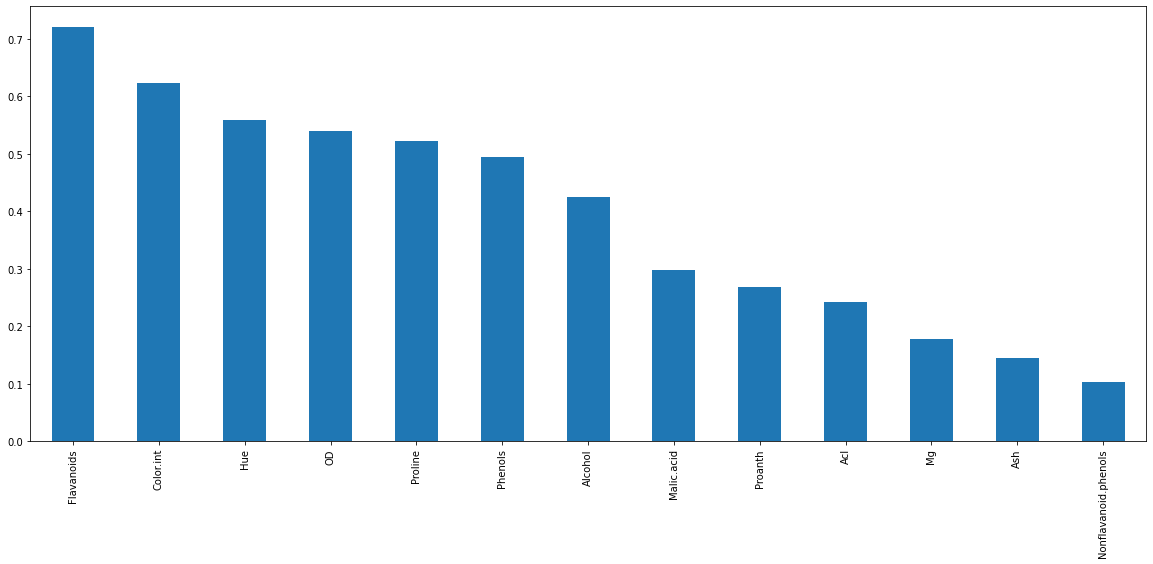

In [21]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [27]:
from sklearn.feature_selection import SelectKBest
#SelectKBest means picking up the first top 5 or 10 features depending on the K value we are using
  #also another way to  pickup percentile of features: basically say pick top 10 percentile or 50 percentile of features


In [26]:
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
#we are using same classfier
# if some missing values are present we can use this
#sel_five_cols.fit(X_train.fillna(0), y_train)
sel_five_cols.fit(X_train, y_train)

X_train.columns[sel_five_cols.get_support()]
## get support basicaaly gives the indexes and based on indexes we are picking up the columns

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

Comparion of Univariate And Mutual Information

Comparison of F-test and mutual information https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py